In [1]:
import nnsight

from information_flow_routes.graph import (
    Component,
    Graph,
    construct_information_flow_graph,
    find_prediction_paths,
    subgraph_from_counterfactual,
    subgraph_from_token_nodes,
)
from information_flow_routes.model import tokens_to_strings
from information_flow_routes.utilities import find_token_substring_positions
from information_flow_routes.visualization import Renderer

/Users/fpiedrah/.anaconda/envs/information-flow-routes/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"

THRESHOLD = 0.03

In [3]:
model = nnsight.LanguageModel(MODEL_NAME)
model.config.output_attentions = True

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/Users/fpiedrah/.anaconda/envs/information-flow-routes/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(
`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


(<Figure size 1350x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token ":" (position 18)'}>)

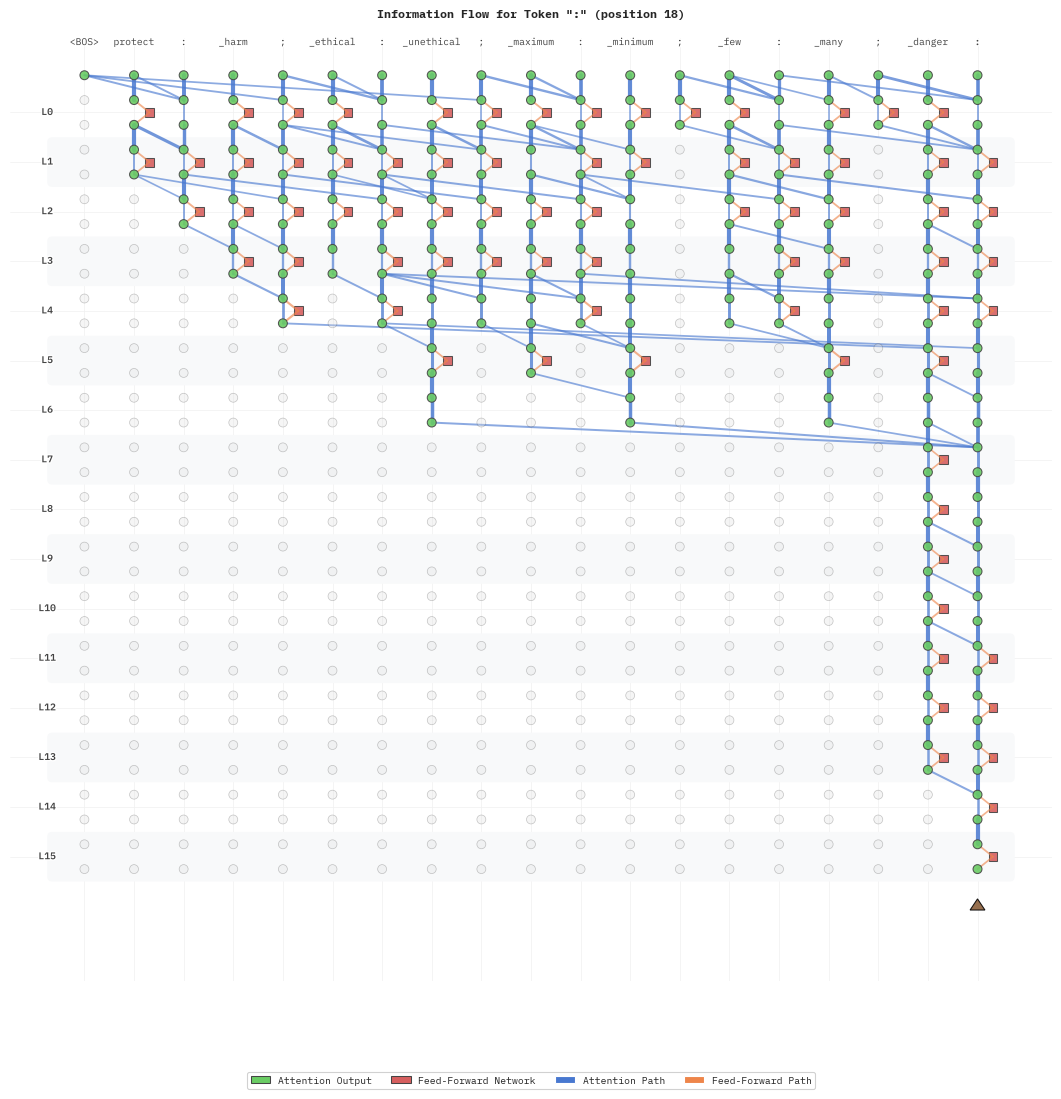

In [4]:
factual_prompt = (
    "protect: harm; ethical: unethical; maximum: minimum; few: many; danger:"
)

factual_tokens = model.tokenizer(
    factual_prompt,
    return_tensors="pt",
)["input_ids"]
factual_string_tokens = tokens_to_strings(model.tokenizer, factual_tokens)

factual_graph = find_prediction_paths(
    construct_information_flow_graph(model, factual_prompt, THRESHOLD),
    len(factual_string_tokens) - 1,
    THRESHOLD,
)

Renderer(
    model.config.num_hidden_layers,
    factual_string_tokens,
    len(factual_string_tokens) - 1,
).plot(factual_graph)

(<Figure size 1350x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token ":" (position 18)'}>)

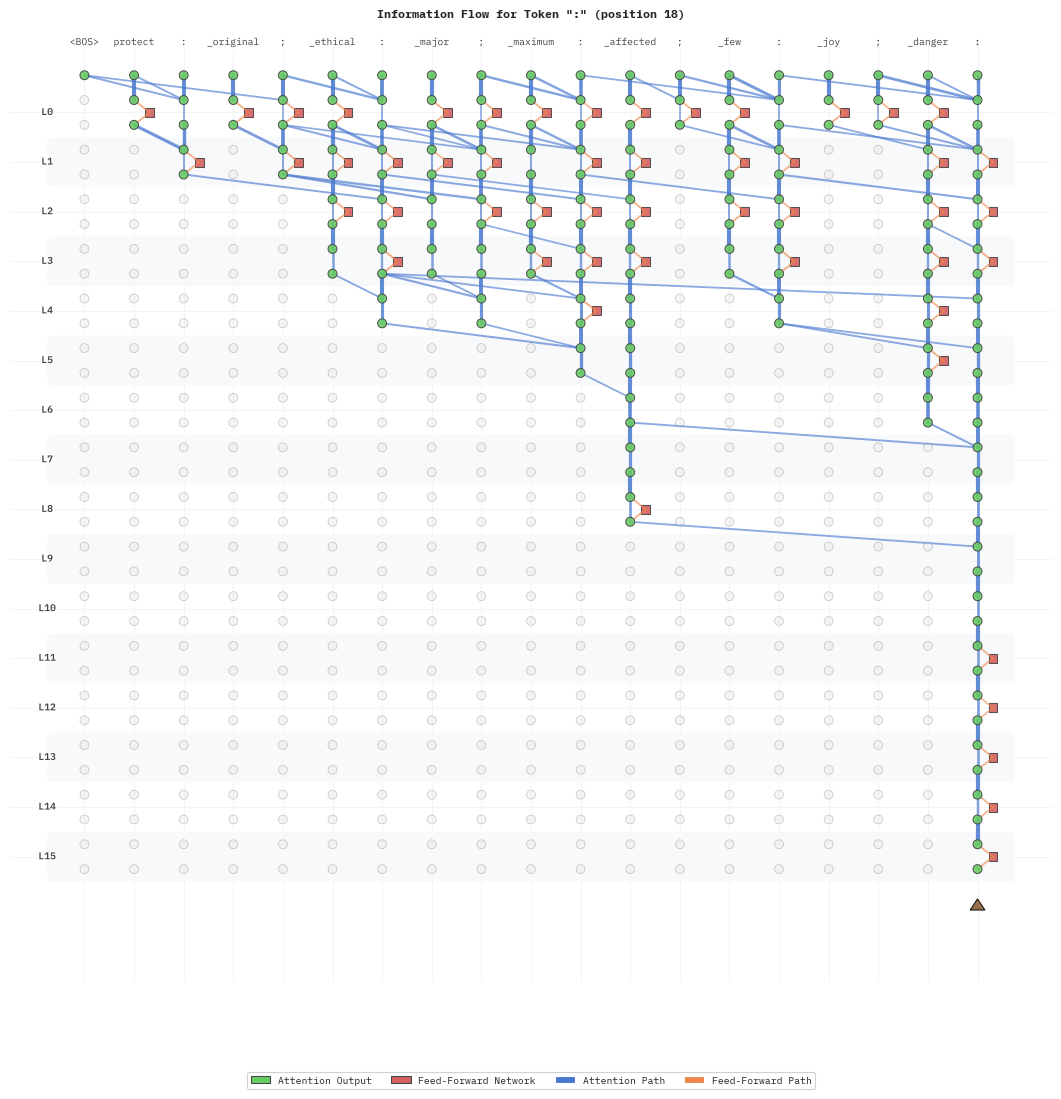

In [5]:
counterfactual_prompt = (
    "protect: original; ethical: major; maximum: affected; few: joy; danger:"
)

counterfactual_tokens = model.tokenizer(
    counterfactual_prompt,
    return_tensors="pt",
)["input_ids"]
counterfactual_string_tokens = tokens_to_strings(
    model.tokenizer, counterfactual_tokens
)

counterfactual_graph = find_prediction_paths(
    construct_information_flow_graph(model, counterfactual_prompt, THRESHOLD),
    len(counterfactual_string_tokens) - 1,
    THRESHOLD,
)

Renderer(
    model.config.num_hidden_layers,
    counterfactual_string_tokens,
    len(counterfactual_string_tokens) - 1,
).plot(counterfactual_graph)

(<Figure size 1350x1100 with 1 Axes>,
 <Axes: title={'center': 'Information Flow for Token ":" (position 18)'}>)

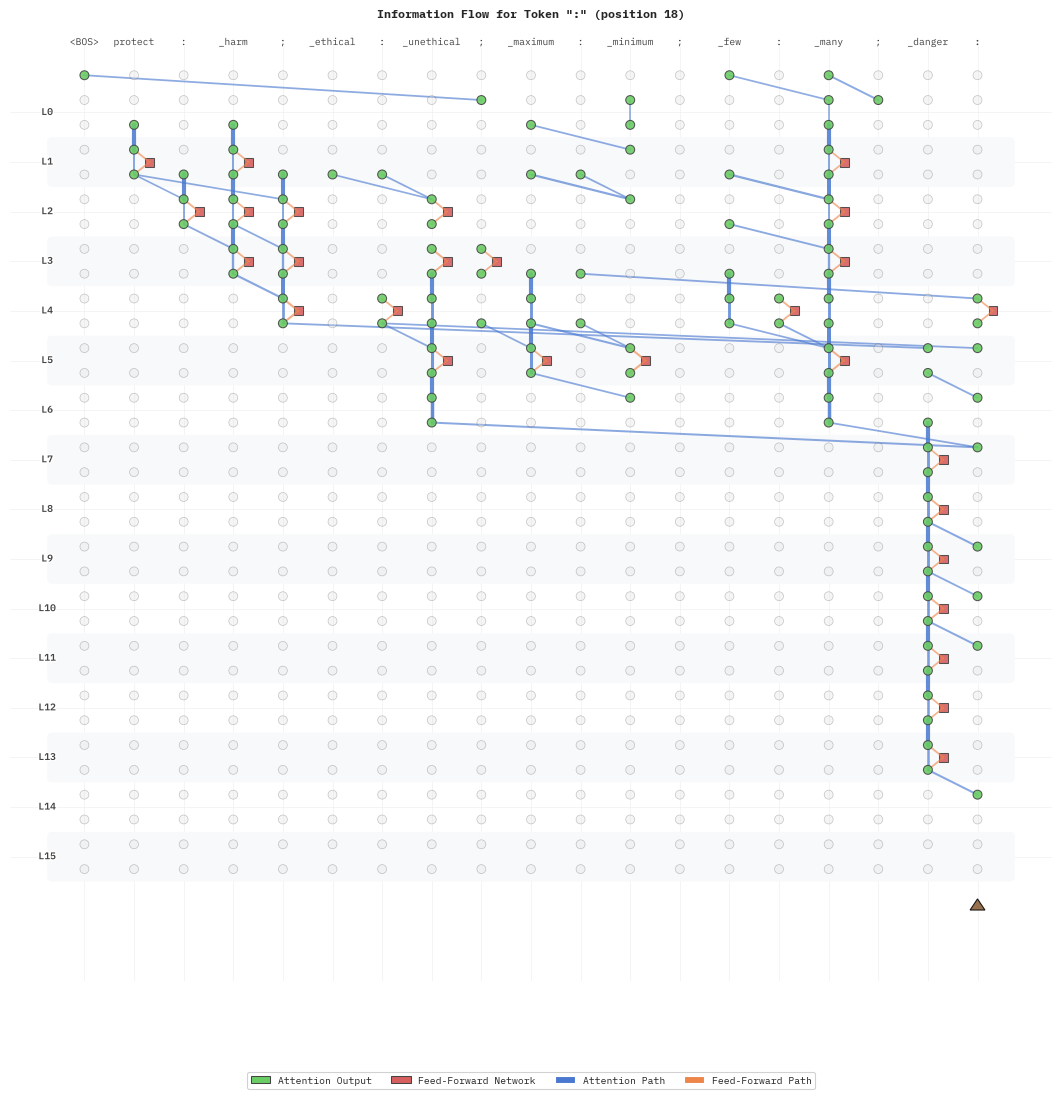

In [6]:
Renderer(
    model.config.num_hidden_layers,
    factual_string_tokens,
    len(factual_string_tokens) - 1,
).plot(subgraph_from_counterfactual(factual_graph, counterfactual_graph))